In [38]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import connected_components
from scipy.stats import entropy
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs, make_moons, make_circles
import os
os.chdir('/Users/apple/Desktop/Master/ProjectLearning/LLMLearning/BuildMyselfLLM')

In [39]:
def build_sparse_graph(data, k=5, threshold=0.5):
    """
    构建稀疏图
    :param data: 数据集
    :param k: k-NN的k值
    :param threshold: 距离阈值
    :return: 稀疏图
    """
    if k > len(data):
        k = len(data) - 1  # 确保k值不超过样本数
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(data)
    distances, indices = nbrs.kneighbors(data)
    rows = np.repeat(np.arange(len(data)), k)
    cols = indices.flatten()
    weights = np.exp(-distances.flatten() ** 2 / (2 * threshold ** 2))
    sparse_graph = csr_matrix((weights, (rows, cols)), shape=(len(data), len(data)))
    return sparse_graph

In [40]:
def calculate_structural_entropy(sparse_graph):
    """
    计算结构熵
    :param sparse_graph: 稀疏图
    :return: 结构熵值
    """
    degree_matrix = np.array(sparse_graph.sum(axis=1)).flatten()
    prob = degree_matrix / degree_matrix.sum()
    return entropy(prob)

In [41]:
def build_coding_tree(sparse_graph):
    """
    构建编码树
    :param sparse_graph: 稀疏图
    :return: 编码树
    """
    n_components, labels = connected_components(csgraph=sparse_graph, directed=False, return_labels=True)
    return labels

In [42]:
def iterative_pre_delete_and_reassign(data, labels, threshold=0.5):
    """
    迭代预删除和重新分配
    :param data: 数据集
    :param labels: 初始标签
    :param threshold: 距离阈值
    :return: 优化后的标签
    """
    n_samples = len(data)
    for i in range(n_samples):
        for j in range(i + 1, n_samples):
            if np.linalg.norm(data[i] - data[j]) < threshold:
                if labels[i] != labels[j]:
                    labels[j] = labels[i]
    return labels

In [43]:
def sec_algorithm(data, k=5, threshold=0.5):
    """
    SEC算法主函数
    :param data: 数据集
    :param k: k-NN的k值
    :param threshold: 距离阈值
    :return: 聚类结果
    """
    sparse_graph = build_sparse_graph(data, k, threshold)
    structural_entropy_value = calculate_structural_entropy(sparse_graph)
    coding_tree_labels = build_coding_tree(sparse_graph)
    optimized_labels = iterative_pre_delete_and_reassign(data, coding_tree_labels, threshold)
    return optimized_labels

In [44]:
# 绘图函数
def plot_results(data, labels_sec, labels_kmeans, labels_dbscan, title):
    plt.figure(figsize=(24, 6))

    # 原始数据集
    plt.subplot(1, 4, 1)
    plt.scatter(data[:, 0], data[:, 1], c='blue' , cmap='viridis')
    plt.title('Original Data')

    # SEC算法结果
    plt.subplot(1, 4, 2)
    plt.scatter(data[:, 0], data[:, 1], c=labels_sec, cmap='viridis')
    plt.title('SEC Algorithm')

    # K-Means算法结果
    plt.subplot(1, 4, 3)
    plt.scatter(data[:, 0], data[:, 1], c=labels_kmeans, cmap='viridis')
    plt.title('K-Means Algorithm')

    # DBSCAN算法结果
    plt.subplot(1, 4, 4)
    plt.scatter(data[:, 0], data[:, 1], c=labels_dbscan, cmap='viridis')
    plt.title('DBSCAN Algorithm')

    plt.suptitle(title)
    plt.show()

/var/folders/3c/2q74k6vj0xqcgk8drx6gmyt00000gn/T/ipykernel_33717/3287568515.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c='blue' , cmap='viridis')


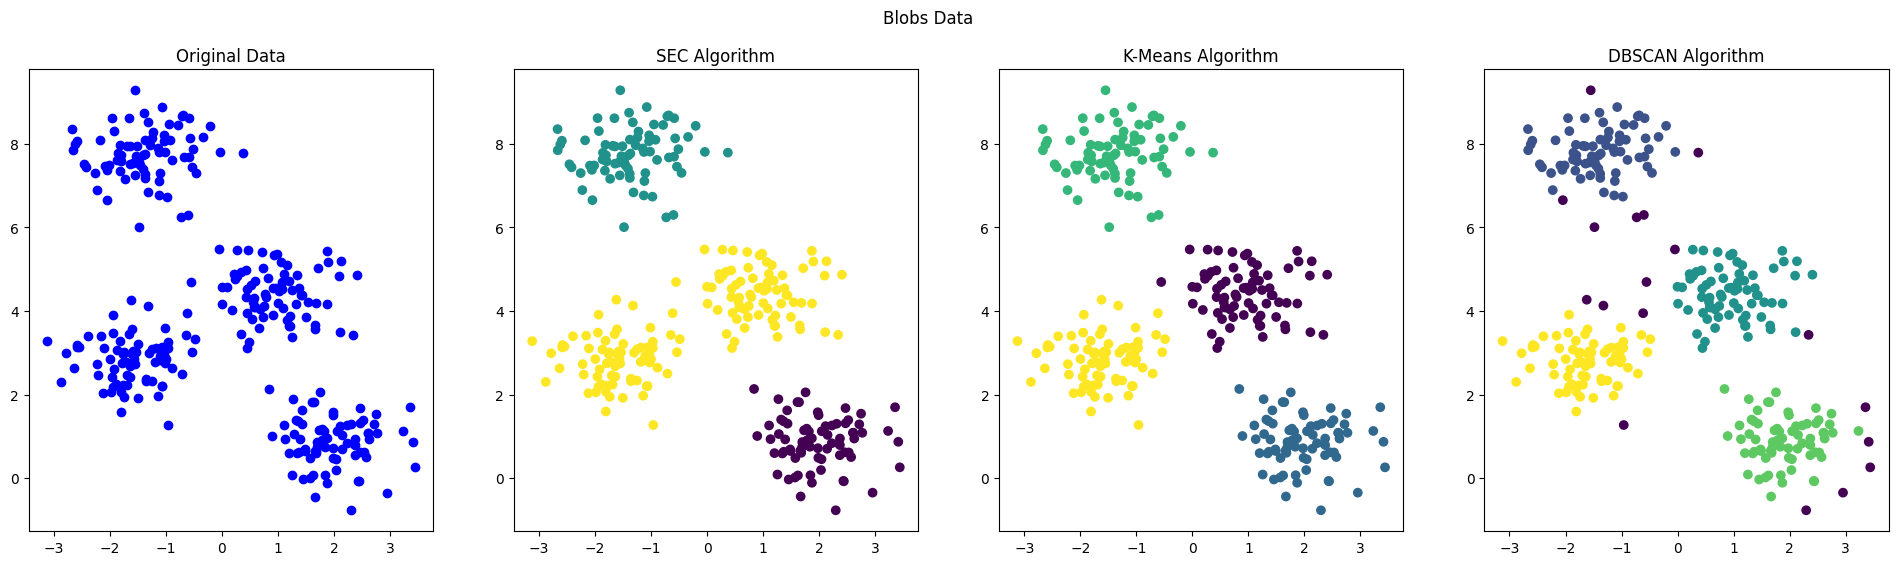

In [45]:
data_blobs, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
data_moons, _ = make_moons(n_samples=300, noise=0.05, random_state=0)
data_circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5, random_state=0)

# 使用SEC算法进行聚类
labels_sec_blobs = sec_algorithm(data_blobs, k=5, threshold=0.5)
labels_sec_moons = sec_algorithm(data_moons, k=5, threshold=0.5)
labels_sec_circles = sec_algorithm(data_circles, k=5, threshold=0.5)

# 使用K-Means算法进行聚类
kmeans = KMeans(n_clusters=4, random_state=0)
labels_kmeans_blobs = kmeans.fit_predict(data_blobs)
labels_kmeans_moons = kmeans.fit_predict(data_moons)
labels_kmeans_circles = kmeans.fit_predict(data_circles)

# 使用DBSCAN算法进行聚类
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels_dbscan_blobs = dbscan.fit_predict(data_blobs)
labels_dbscan_moons = dbscan.fit_predict(data_moons)
labels_dbscan_circles = dbscan.fit_predict(data_circles)

# 绘制结果
plot_results(data_blobs, labels_sec_blobs, labels_kmeans_blobs, labels_dbscan_blobs, 'Blobs Data')

/var/folders/3c/2q74k6vj0xqcgk8drx6gmyt00000gn/T/ipykernel_33717/3287568515.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c='blue' , cmap='viridis')


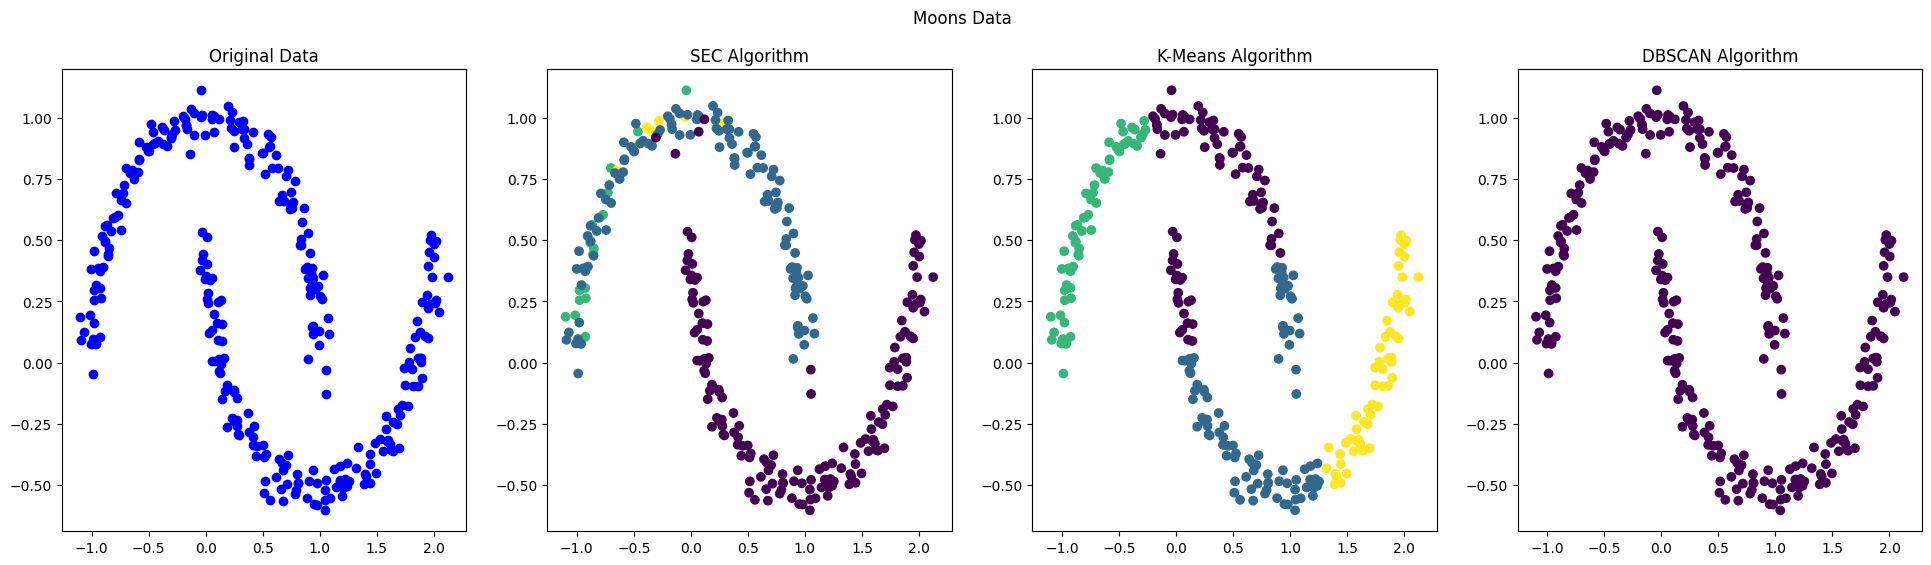

In [46]:
plot_results(data_moons, labels_sec_moons, labels_kmeans_moons, labels_dbscan_moons, 'Moons Data')

/var/folders/3c/2q74k6vj0xqcgk8drx6gmyt00000gn/T/ipykernel_33717/3287568515.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data[:, 0], data[:, 1], c='blue' , cmap='viridis')


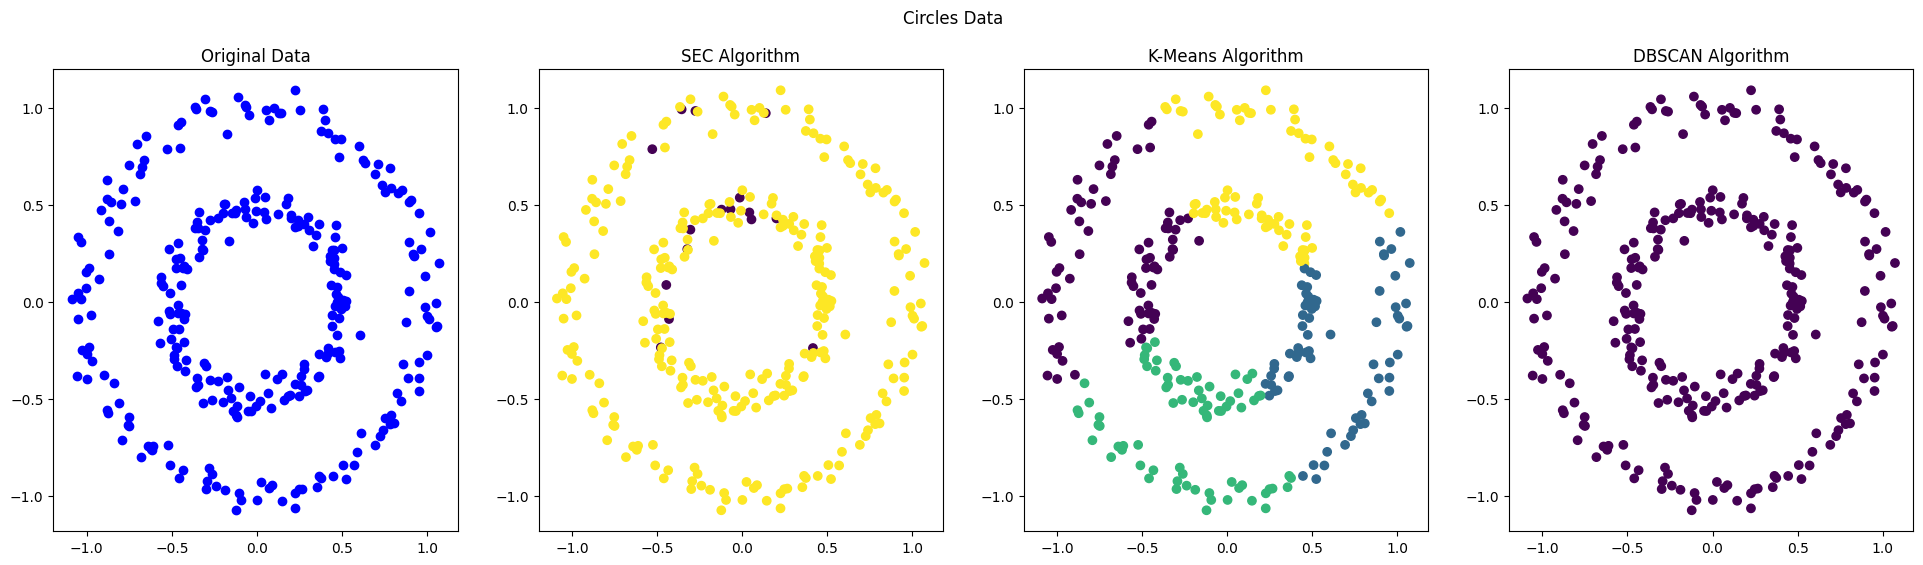

In [47]:
plot_results(data_circles, labels_sec_circles, labels_kmeans_circles, labels_dbscan_circles, 'Circles Data')